In [1]:
# Import libraries
import numpy as np
import pandas as pd
from keras.models import model_from_json
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay

In [2]:
emotion_dict = {0: "Angry", 1: "Disgusted", 2: "Fearful", 3: "Happy", 4: "Neutral", 5: "Sad", 6: "Surprised"}

In [3]:
# Load model
emotion_model = load_model('models/emotion_model_2.h5')

In [4]:
# Initialize image data generator with rescaling
test_data_gen = ImageDataGenerator(rescale=1./255)

In [5]:
# Preprocess all test images
test_set = test_data_gen.flow_from_directory(
        'data/test',
        target_size=(48, 48),
        batch_size=64,
        color_mode="grayscale",
        class_mode='categorical')

Found 7066 images belonging to 7 classes.


In [6]:
# do prediction on test data
predictions = emotion_model.predict(test_set)

111/111 [==============================] - 13s 111ms/step


In [7]:
# See predictions
for result in predictions:
    max_index = int(np.argmax(result))
    print(max_index, emotion_dict[max_index])

3 Happy
6 Surprised
4 Neutral
6 Surprised
3 Happy
3 Happy
3 Happy
0 Angry
0 Angry
0 Angry
6 Surprised
6 Surprised
4 Neutral
3 Happy
5 Sad
3 Happy
5 Sad
0 Angry
4 Neutral
4 Neutral
3 Happy
0 Angry
3 Happy
4 Neutral
4 Neutral
0 Angry
0 Angry
3 Happy
5 Sad
5 Sad
6 Surprised
6 Surprised
3 Happy
4 Neutral
0 Angry
4 Neutral
2 Fearful
0 Angry
5 Sad
0 Angry
4 Neutral
3 Happy
0 Angry
6 Surprised
4 Neutral
0 Angry
3 Happy
0 Angry
2 Fearful
5 Sad
3 Happy
3 Happy
5 Sad
3 Happy
5 Sad
3 Happy
4 Neutral
4 Neutral
0 Angry
5 Sad
0 Angry
5 Sad
3 Happy
0 Angry
2 Fearful
5 Sad
5 Sad
0 Angry
5 Sad
5 Sad
3 Happy
4 Neutral
3 Happy
4 Neutral
4 Neutral
5 Sad
3 Happy
6 Surprised
0 Angry
3 Happy
3 Happy
3 Happy
1 Disgusted
3 Happy
3 Happy
0 Angry
4 Neutral
6 Surprised
2 Fearful
1 Disgusted
4 Neutral
0 Angry
6 Surprised
4 Neutral
6 Surprised
4 Neutral
5 Sad
6 Surprised
3 Happy
5 Sad
6 Surprised
5 Sad
5 Sad
5 Sad
0 Angry
0 Angry
5 Sad
2 Fearful
5 Sad
3 Happy
6 Surprised
4 Neutral
0 Angry
3 Happy
3 Happy
0 Angry
4 

[[131  12  63 258 238 150 108]
 [ 10   0   7  27  26  27  14]
 [132   9  88 270 233 158 128]
 [242  19 142 505 396 322 199]
 [171  12 107 316 276 200 134]
 [150  18  88 329 256 171 127]
 [102  10  59 243 179 120  84]]


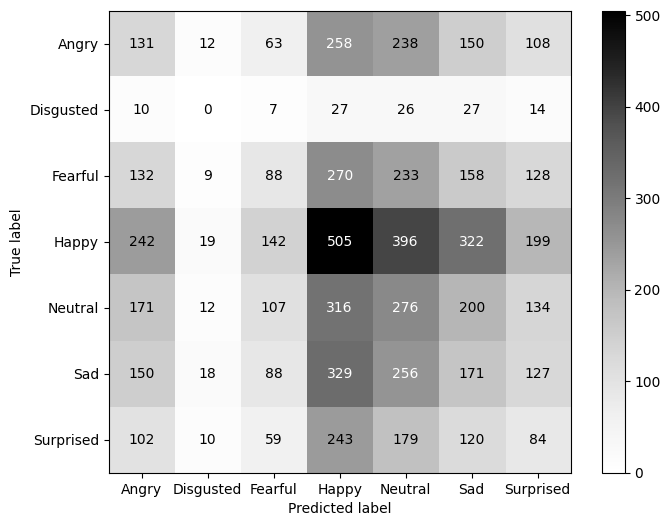

In [8]:
# Confusion matrix
confusion = confusion_matrix(test_set.classes, predictions.argmax(axis=1))
print(confusion)

cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=list(emotion_dict.values()))
plt.figure(figsize=(8, 6))
cm_display.plot(cmap=plt.cm.Greys, values_format=".0f", ax=plt.gca(), colorbar=True)

plt.show()

In [11]:
# Classification report
print("-----------------------------------------------------------------")
print(classification_report(test_set.classes, predictions.argmax(axis=1)))

-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.14      0.14      0.14       960
           1       0.00      0.00      0.00       111
           2       0.16      0.09      0.11      1018
           3       0.26      0.28      0.27      1825
           4       0.17      0.23      0.20      1216
           5       0.15      0.15      0.15      1139
           6       0.11      0.11      0.11       797

    accuracy                           0.18      7066
   macro avg       0.14      0.14      0.14      7066
weighted avg       0.17      0.18      0.17      7066

